This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 5 embryo particles with calculated initial status according to the hypothesis, whose mass are $6M_{\oplus}$ respectively.

After that we, considering the collision and merger, integrate the system for a preinstall long time units and plot the figure.

In [11]:
import rebound
import numpy as np
import random
sim = rebound.Simulation()

# Collisions
sim.collision = "direct"
sim.collision_resolve = "merge"

# Integrator Options
sim.integrator = "mercurius"
sim.dt = 0.0001*2.*np.pi

# Boundary condition
sim.configure_box(100.)   # confine the simulation to a box of size 100
sim.boundary = "open"

# Simulation Time
tmax = 1e3*2.*np.pi

#np.random.seed(12)

In [12]:
# Massive Bodies
sim.add(hash = "sun", m = 1., r = 0.005)
a_jupiter = 3.5 # Au
a_saturn = 4.58 # Au
sim.add(hash = "jupiter", m = 0.0009547919152112404, a = a_jupiter, r = 0.00046733)
sim.add(hash = "saturn", m = 0.0002858856727222417, a = a_saturn, r = 0.00038926)

# sim.N_active = sim.N

In [13]:
# Embryos
# 行星胚胎群总距离 a = 8 AU
n_embryos = 5
e = random.randint(1,10)*0.001*np.pi/180
inc = random.randint(1,10)*0.001*np.pi/180
Omega = random.randint(0,360)*np.pi/180
omega = random.randint(0,360)*np.pi/180
m = 6*3.040432648022642e-06
rho = 3
r = (((m*1.988e33)/(4*np.pi))**(1/3))/1.4960e13
a_default = 8 # AU
hillradii = a_default * (1 - e) * (m/(3*1))**(1/3)

for i in xrange(0, n_embryos):
    rand = np.random.random()*2*np.pi
    a = i * 0.5 * hillradii + 8 - (5 * hillradii)
    sim.add(m = m, r = r, a = a, e = e, inc = inc, Omega = Omega, omega = omega, f = rand)
   # sim.particles[i+3].lastcollision = 0

In [14]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	8
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7effae45ee18, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7effae3f6158, m=0.0009547919152112404 x=3.5 y=0.0 z=0.0 vx=0.0 vy=0.534777601816256 vz=0.0>
<rebound.particle.Particle object at 0x7effae45ee18, m=0.0002858856727222417 x=4.58333858405018 y=0.0 z=0.0 vx=0.0 vy=0.46806920322445394 vz=0.0>
<rebound.particle.Particle object at 0x7effae3f6158, m=1.824259588813585e-05 x=2.2173387262268043 y=-6.9247971551720875 z=-0.0011181166681322743 vx=0.3535051026273182 vy=0.11364505186334539 vz=1.1848682659772863e-05>
<rebound.particle.Particle object at 0x7effae45ee18, m=1.824259588813585e-05 x=4.115186635046572 y=-6.084198067427679 z=-0.001017960325

In [15]:
for i in range(0, 3+n_embryos):
    print(sim.particles[i].m)

1.0
0.0009547919152112404
0.0002858856727222417
1.824259588813585e-05
1.824259588813585e-05
1.824259588813585e-05
1.824259588813585e-05
1.824259588813585e-05


In [16]:
sim.move_to_com()
E0 = sim.calculate_energy()

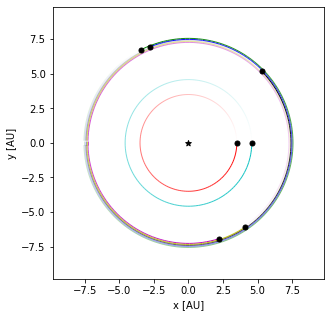

In [17]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, Narc=300)

In [18]:
sim.getWidget(size=(500,300),scale=2.0*a_saturn)

Widget(N=8, count=2, height=300.0, orbit_data=b'\x9cu\x9b\xbb\xfa\xbf\xdf\xb8+\\\x81\xb2\x00\x00`@M\xc9_%\xdb\…

In [19]:
sim.integrate(tmax)
dE = abs((sim.calculate_energy() - E0)/E0)
print(dE)

1.976497433503434e-12


In [20]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	8
Selected integrator: 	mercurius
Simulation time:     	6.2831853071795858e+03
Current timestep:    	0.000628
---------------------------------
<rebound.particle.Particle object at 0x7effae3ae7b8, m=1.0 x=-0.000905146536438051 y=0.0030270246403994215 z=-3.4691250890374344e-10 vx=-0.00048273913781520753 vy=-6.044161876161062e-05 vz=3.628030387413709e-10>
<rebound.particle.Particle object at 0x7effae3ae378, m=0.0009547919152112404 x=-0.4974264399803132 y=-3.434605825114109 z=2.6472665057494158e-06 vx=0.5324253565302353 vy=-0.0726265366740834 vz=-1.0946555531955233e-06>
<rebound.particle.Particle object at 0x7effae3ae7b8, m=0.0002858856727222417 x=4.651269002207121 y=0.7990980352539632 z=-1.8530529928620757e-05 vx=-0.08688279124221614 vy=0.4479263502974986 vz=8.644906822279153e-07>
<rebound.particle.Particle object at 0x7effae3ae378, m=1.824259588813585e-05 x=4.2